# Worksheet 23

Name: Jian Xie
UID: U75516303

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

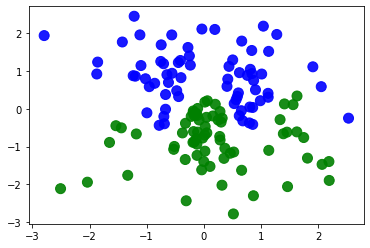

Epoch 1/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.6322
Epoch 2/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.4329
Epoch 3/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.3046
Epoch 4/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.2681
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2597
Epoch 6/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.2572
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2623
Epoch 8/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.2618
Epoch 9/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.2718
Epoch 10/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 11/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.2621
Epoch 12/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2599
Epoch 13/2000
9/9 [==============================

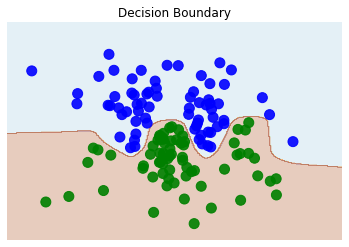

In [46]:
from tensorflow.python.keras.optimizer_v2.adam import Adam
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(10, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.06))

# 50 batch_size
# 0.001 -> 0.26, ...,  0.007 -> 0.18,  
# 0.01 -> 0.14, 0.08 -> 0.08

# 32 batch_size
# 0.08 -> 0.045, 0.09 -> 0.045, 0.1 -> 0.045, 0.11 -> 0.08
# 16 batch_size
# 0.09 -> 0.040, 0.02 -> 0.10
# 8 batch_size
# 0.01 -> 0.08

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=16, epochs=2000) # 1000 or 2000

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()